<a href="https://colab.research.google.com/github/himanshira/Data-Science/blob/main/Autonomous_Driving_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autonomous Driving Project -
##Analyze the usage of autopilot and its effect on road safety

In [ ]:
# --- Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

In [ ]:
# --- Load Dataset ---
tesla_death = '/content/drive/MyDrive/---/Autonomous Driving/Tesla - Deaths.csv'
death_df = pd.read_csv(tesla_death)
death_df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


###Perform preliminary data inspection, checking for data types, missing values, and duplicates

In [ ]:
# --- Check Data Types ---
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    float64
 7  

In [ ]:
#--- Regex to remove the extra spaces from the column names
cleaned_columns = [re.sub(r'\s+', ' ', col).strip() for col in death_df.columns]
#--- Apply to the Dataframe ---
death_df.columns = cleaned_columns
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Case #                                                              294 non-null    float64
 1   Year                                                                294 non-null    float64
 2   Date                                                                294 non-null    object 
 3   Country                                                             294 non-null    object 
 4   State                                                               294 non-null    object 
 5   Description                                                         295 non-null    object 
 6   Deaths                                                              299 non-null    float64
 7   Tesla driver     

###Remove any columns that might not be relevant for the analysis


In [ ]:
#--- Drop uneccessary columns from the dataset ---
death_df = death_df.drop(columns=['Unnamed: 16','Unnamed: 17'], axis=1)
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Case #                                                              294 non-null    float64
 1   Year                                                                294 non-null    float64
 2   Date                                                                294 non-null    object 
 3   Country                                                             294 non-null    object 
 4   State                                                               294 non-null    object 
 5   Description                                                         295 non-null    object 
 6   Deaths                                                              299 non-null    float64
 7   Tesla driver     

In [ ]:
#--- Inspecting for missing values ---
death_df.isnull().sum()

,0
Case #,13
Year,13
Date,13
Country,13
State,13
Description,12
Deaths,8
Tesla driver,13
Tesla occupant,17
Other vehicle,12


In [ ]:
#--- Inspect categorical columns for missing values ---
categorical_columns = death_df[['State', 'Country', 'Description', 'Model', 'Note', 'Deceased 1', 'Deceased 2', 'Deceased 3', 'Source']]
categorical_columns.isnull().sum()

,0
State,13
Country,13
Description,12
Model,11
Note,298
Deceased 1,220
Deceased 2,290
Deceased 3,303
Source,10


In [ ]:
#--- Print unique values ---
print("\n\t--- Unique values for categorical columns ---\n")
for col in categorical_columns:
  print(f"The unique values in {col}: {death_df[col].unique()}\n")


	--- Unique values for categorical columns ---

The unique values in State: ['CA' '-' 'WA' 'GA' 'MO' 'AR' 'IL' 'FL' 'SC' 'MD' 'NY' 'MA' 'ME' 'UT' 'PA'
 'HA' 'AL' ' MI ' ' CA ' ' NV ' ' NY ' ' OR ' ' AZ ' ' NJ ' ' CO ' ' UT '
 ' PA ' ' NC ' ' FL ' ' ID ' ' MO ' ' OH ' ' GA ' ' IA ' ' WA ' ' VA '
 ' TX ' ' IL ' ' IN ' ' DE ' ' NH ' ' TN ' ' HI ' nan]

The unique values in Country: [' USA ' ' Canada ' ' China ' ' Mexico ' ' UK ' ' Germany ' ' Finland '
 ' Australia ' ' Netherlands ' ' Switzerland ' ' France ' ' Denmark '
 ' Belgium ' ' Portugal ' ' South Korea ' ' Norway ' ' Taiwan '
 ' Slovenia ' ' Austria ' ' Ukraine ' ' Spain ' ' Holland ' ' Japan ' nan]

The unique values in Description: [' Tesla crashes into back of semi ' ' Tesla crashes '
 ' Tesla hits pole, catches on fire ' ' Tesla crashes and burns '
 ' Tesla crashes into storefront ' ' Tesla hit two other cars '
 ' Tesla hits pedestrian on highway ' ' Tesla crashes into wall '
 ' Collision at intersection ' ' Tesla veers, coll

In [ ]:
#--- Removing Nan, '-', or ' ' from the categorical column using Regex ---
for col in categorical_columns:
    if col in death_df.columns:

        if death_df[col].dtype != 'object':
            print(f"Converting '{col}' from {death_df[col].dtype} to object.")
            death_df[col] = death_df[col].astype(object)


        values_to_replace_with_nan = ['-', ' - ', 'nan', 'NaN', 'None', 'NULL', ' ']


        mask_to_replace = death_df[col].isin(values_to_replace_with_nan)
        death_df.loc[mask_to_replace, col] = np.nan


        death_df[col] = death_df[col].apply(
            lambda x: re.sub(r'\s+', ' ', str(x)).strip() if pd.notna(x) else x
        )


        death_df.loc[death_df[col] == '', col] = np.nan


print("\n\t--- Filling remaining NaN values with 'Unknown' ---\n")
for col in categorical_columns:
    if col in death_df.columns:
        # Fill any remaining np.nan values with "Unknown"
        death_df[col] = death_df[col].fillna("Unknown")

# --- Print unique values for final verification ---
print("\n\t--- Unique values after final cleaning and filling ---\n")
for col in categorical_columns:
    if col in death_df.columns:
        print(f"The unique values in {col}: {death_df[col].unique()}\n")


	--- Filling remaining NaN values with 'Unknown' ---


	--- Unique values after final cleaning and filling ---

The unique values in State: ['CA' 'Unknown' 'WA' 'GA' 'MO' 'AR' 'IL' 'FL' 'SC' 'MD' 'NY' 'MA' 'ME'
 'UT' 'PA' 'HA' 'AL' 'MI' 'NV' 'OR' 'AZ' 'NJ' 'CO' 'NC' 'ID' 'OH' 'IA'
 'VA' 'TX' 'IN' 'DE' 'NH' 'TN' 'HI']

The unique values in Country: ['USA' 'Canada' 'China' 'Mexico' 'UK' 'Germany' 'Finland' 'Australia'
 'Netherlands' 'Switzerland' 'France' 'Denmark' 'Belgium' 'Portugal'
 'South Korea' 'Norway' 'Taiwan' 'Slovenia' 'Austria' 'Ukraine' 'Spain'
 'Holland' 'Japan' 'Unknown']

The unique values in Description: ['Tesla crashes into back of semi' 'Tesla crashes'
 'Tesla hits pole, catches on fire' 'Tesla crashes and burns'
 'Tesla crashes into storefront' 'Tesla hit two other cars'
 'Tesla hits pedestrian on highway' 'Tesla crashes into wall'
 'Collision at intersection' 'Tesla veers, collides with truck'
 'Tesla runs red light, collides with two cars'
 'Tesla careens off road, 

In [ ]:
death_df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,Unknown,-,-,-,https://web.archive.org/web/20230118162813/htt...,Unknown,Unknown,Unknown,Unknown,NaN
1,293.0,2022.0,1/7/2023,Canada,Unknown,Tesla crashes,1.0,1,-,-,...,Unknown,-,-,-,https://web.archive.org/web/20230109041434/htt...,Unknown,Taren Singh Lal,Unknown,Unknown,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,Unknown,-,-,-,https://web.archive.org/web/20230107232745/htt...,Unknown,Unknown,Unknown,Unknown,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,Unknown,-,-,-,https://web.archive.org/web/20221222203930/htt...,Unknown,Unknown,Unknown,Unknown,NaN
4,290.0,2022.0,12/19/2022,Canada,Unknown,Tesla crashes into storefront,1.0,-,-,-,...,Unknown,-,-,-,https://web.archive.org/web/20221223203725/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
#--- Clean Numerical Columns ---

numerical_columns = death_df[['Case #', 'Deaths', 'Tesla driver',	'Tesla occupant',	'Other vehicle', 'Autopilot claimed',	'Verified Tesla Autopilot Deaths',	'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO', 'Cyclists/ Peds', 'TSLA+cycl / peds', 'Deceased 4']]
numerical_columns

,Case #,Deaths,Tesla driver,Tesla occupant,Other vehicle,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Cyclists/ Peds,TSLA+cycl / peds,Deceased 4
0,294.0,1.0,1,-,-,-,-,-,-,1,NaN
1,293.0,1.0,1,-,-,-,-,-,-,1,NaN
2,292.0,1.0,-,1,-,-,-,-,-,1,NaN
3,291.0,1.0,1,-,-,-,-,-,-,1,NaN
4,290.0,1.0,-,-,-,-,-,-,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#--- Count Nan values in numerical Columns ---
numerical_columns.isnull().sum()

,0
Case #,13
Deaths,8
Tesla driver,13
Tesla occupant,17
Other vehicle,12
Autopilot claimed,26
Verified Tesla Autopilot Deaths,10
Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,11
Cyclists/ Peds,11
TSLA+cycl / peds,10


In [ ]:
# Clean the categorical columns using strip
death_df['Deaths'] = death_df['Deaths'].astype(str).str.strip()
death_df['State'] = death_df['State'].astype(str).str.strip()
death_df['Country'] = death_df['Country'].astype(str).str.strip()
death_df['Tesla driver'] = death_df['Tesla driver'].astype(str).str.strip()
death_df['Tesla occupant'] = death_df['Tesla occupant'].astype(str).str.strip()
death_df['Other vehicle'] = death_df['Other vehicle'].astype(str).str.strip()
death_df['Deceased 1'] = death_df['Deceased 1'].astype(str).str.strip()
death_df['Deceased 2'] = death_df['Deceased 2'].astype(str).str.strip()
death_df['Deceased 3'] = death_df['Deceased 3'].astype(str).str.strip()
death_df['Cyclists/ Peds'] = death_df['Cyclists/ Peds'].astype(str).str.strip()
death_df['TSLA+cycl / peds'] = death_df['TSLA+cycl / peds'].astype(str).str.strip()
death_df['Model'] = death_df['Model'].astype(str).str.strip()
death_df['Verified Tesla Autopilot Deaths'] = death_df['Verified Tesla Autopilot Deaths'].astype(str).str.strip()
death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] = death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].astype(str).str.strip()
death_df['Autopilot claimed'] = death_df['Autopilot claimed'].astype(str).str.strip()

#'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'

In [ ]:
death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].unique()

array(['-', 'nan', '1', '2', '3', '24', '27'], dtype=object)

In [ ]:
view_tesla_death = death_df[(death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] == '27')|
                            (death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] == '24')|
                            (death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] == '3')]


view = view_tesla_death[['Deaths', 'Other vehicle', 'Verified Tesla Autopilot Deaths',
          'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
          'TSLA+cycl / peds', 'Tesla driver', 'Deceased 1', 'Deceased 2', 'Deceased 3', 'Deceased 4']]
view

,Deaths,Other vehicle,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,TSLA+cycl / peds,Tesla driver,Deceased 1,Deceased 2,Deceased 3,Deceased 4
294,92.0,29,3,3,61,28,Unknown,Unknown,Unknown,NaN
295,261.0,101,16,24,149,89,Unknown,Unknown,Unknown,NaN
296,353.0,130,19,27,210,117,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df.drop([294, 295, 296 ], inplace=True)

In [ ]:
view_tesla_death = death_df[(death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] == '27')|
                            (death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] == '24')|
                            (death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] == '3')]
view_tesla_death

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4


In [ ]:
death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].unique()

array(['-', 'nan', '1', '2'], dtype=object)

In [ ]:
death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] = death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].apply(
    lambda x: 0 if x== '2' else x)
death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] = death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].apply(
    lambda x: 0 if x== 'nan' else x)
death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'] = death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].apply(
    lambda x: 0 if x== '-' else x)
death_df['Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'].unique()

array([0, '1'], dtype=object)

#Deaths

In [ ]:
death_df['Deaths'].unique()

array(['1.0', '2.0', '4.0', '3.0', 'nan', '2013.0'], dtype=object)

In [ ]:
view_tesla_2013 = death_df[death_df['Deaths'] == '2013.0']
view_tesla_2013

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
301,NaN,NaN,NaN,Unknown,Unknown,Unknown,2013.0,2014,2015,2016,...,2019,2020,2021,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df.drop([301], inplace=True)

In [ ]:
view_tesla_3 = death_df[death_df['Deaths'] == '3.0']
view_tesla_3

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
37,257.0,2022.0,8/16/2022,Germany,Unknown,"Tesla car crashes into tree, burns",3.0,-,-,-,...,Unknown,nan,-,0,https://web.archive.org/web/20220820195541/htt...,Unknown,Unknown,Unknown,Unknown,NaN
72,222.0,2022.0,5/11/2022,USA,CA,Tesla smashes into construction equipment,3.0,1,2,-,...,S,1,-,0,https://web.archive.org/web/20220817111727/htt...,Unknown,Wayne Walter Swanson Jr.,Crystal McCallum,Andrew James Chaves,NaN
119,175.0,2021.0,8/25/2021,USA,AZ,Tesla runs a red light and hits another car,3.0,-,-,3,...,Unknown,-,-,0,https://web.archive.org/web/20220817113431/htt...,Unknown,Ariyanna Parsad,Jazmine Marquez,Kiyvon Martin,NaN
172,122.0,2020.0,6/21/2020,Germany,Unknown,"Tesla veers into other lane, crashes into onco...",3.0,-,-,3,...,3,1,-,0,https://web.archive.org/web/20220817115020/htt...,Unknown,Claudia Günther,Frau Sarah,Claudias Mutter Sylvia,NaN
185,109.0,2020.0,2/24/2020,Canada,Unknown,Tesla drives off cliff,3.0,1,2,-,...,3,-,-,0,https://web.archive.org/web/20211224225454/htt...,Unknown,Mike Cochlin,Liam Cochlin,Quinn Cochlin,NaN
291,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3.0,-,-,3,...,Unknown,-,-,0,https://web.archive.org/web/20220412004559/htt...,Unknown,Unknown,Unknown,Unknown,NaN
300,NaN,NaN,NaN,Unknown,Unknown,Unknown,3.0,6,5,16,...,50,47,75,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
view_tesla_2 = death_df[death_df['Deaths'] == '2.0']
view_tesla_2

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
10,284.0,2022.0,11/28/2022,China,Unknown,"Tesla runs red light, collides with two cars",2.0,-,-,2,...,Y,-,-,0,https://web.archive.org/web/20221201065037/htt...,Unknown,Unknown,Unknown,Unknown,NaN
17,277.0,2022.0,11/5/2022,China,Unknown,Out of control Tesla hits bicyclist and motorc...,2.0,-,-,1,...,Unknown,-,-,0,https://web.archive.org/web/20221113202525/htt...,Unknown,Unknown,Unknown,Unknown,NaN
24,270.0,2022.0,9/18/2022,USA,SC,"Tesla crashes into tree, ignites",2.0,1,1,-,...,Unknown,-,-,0,https://archive.ph/eVnc8,Unknown,Unknown,Unknown,Unknown,NaN
33,261.0,2022.0,8/23/2022,USA,SC,Multi-car accident on highway,2.0,-,-,2,...,3,nan,2,0,https://web.archive.org/web/20221019005507/htt...,Unknown,Unknown,Unknown,Unknown,NaN
45,249.0,2022.0,7/12/2022,China,Unknown,Out of control Tesla hits pedestrians,2.0,-,-,-,...,Y,-,-,0,https://web.archive.org/web/20220817110831/htt...,Unknown,Unknown,Unknown,Unknown,NaN
49,245.0,2022.0,7/6/2022,USA,FL,Tesla hits parked tractor-trailer,2.0,1,1,-,...,Unknown,2,2,0,https://web.archive.org/web/20220817111255/htt...,Unknown,Unknown,Unknown,Unknown,NaN
55,239.0,2022.0,6/19/2022,USA,MI,"Tesla hits telephone pole, ignites",2.0,1,1,-,...,Unknown,-,-,0,https://www.uppermichiganssource.com/2021/06/1...,Unknown,"Candice Marie Rajala,",Eric Joseph Roycroft,Unknown,NaN
56,238.0,2022.0,6/17/2022,USA,CA,Head-on collision,2.0,1,1,-,...,Unknown,-,-,0,https://web.archive.org/web/20220817110830/htt...,Unknown,James Clinton Davies,Alex Francisco Cuesta,Unknown,NaN
62,232.0,2022.0,5/28/2022,USA,OR,Tesla loses control and crashes into car,2.0,1,-,1,...,Y,-,-,0,https://web.archive.org/web/20220531173206/htt...,Unknown,Fredrick Scheffler II,Kyle Rieger,Unknown,NaN
73,221.0,2022.0,5/7/2022,USA,UT,Tesla DUI involving another vehicle,2.0,-,-,2,...,Unknown,-,-,0,https://web.archive.org/web/20220817111705/htt...,Unknown,Joseph Lucero,Sarina Astorga,Unknown,NaN


In [ ]:
view_tesla_4 = death_df[death_df['Deaths'] == '4.0']
view_tesla_4

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
20,274.0,2022.0,10/18/2022,USA,FL,"Tesla collides with minivan, engulfed by flames",4.0,1,1,2,...,Unknown,-,-,0,https://web.archive.org/web/20221020002232/htt...,Unknown,Unknown,Unknown,Unknown,NaN
38,256.0,2022.0,8/14/2022,USA,CA,Tesla veers into oncoming traffic,4.0,1,3,-,...,Unknown,nan,-,0,https://web.archive.org/web/20220820182847/htt...,Unknown,Unknown,Unknown,Unknown,NaN
133,161.0,2021.0,5/26/2021,USA,VA,Tesla involved in multi-car highway accident,4.0,-,-,4,...,Unknown,-,-,0,https://web.archive.org/web/20220817114521/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df['Deaths'] = death_df['Deaths'].apply(
    lambda x: 2 if x== '2.0' else x)
death_df['Deaths'] = death_df['Deaths'].apply(
    lambda x: 0 if x== 'nan' else x)
death_df['Deaths'] = death_df['Deaths'].apply(
    lambda x: 0 if x== '-' else x)
death_df['Deaths'] = death_df['Deaths'].apply(
    lambda x: 3 if x== '3.0' else x)
death_df['Deaths'] = death_df['Deaths'].apply(
    lambda x: 4 if x== '4.0' else x)
death_df['Deaths'] = death_df['Deaths'].apply(
    lambda x: 1 if x== '1.0' else x)
death_df['Deaths'].unique()

array([1, 2, 4, 3, 0])

In [ ]:
death_df['Deaths'].astype(int)
death_df['Deaths'].unique()

array([1, 2, 4, 3, 0])

In [ ]:
death_df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,-,-,...,Unknown,-,-,0,https://web.archive.org/web/20230118162813/htt...,Unknown,Unknown,Unknown,Unknown,NaN
1,293.0,2022.0,1/7/2023,Canada,Unknown,Tesla crashes,1,1,-,-,...,Unknown,-,-,0,https://web.archive.org/web/20230109041434/htt...,Unknown,Taren Singh Lal,Unknown,Unknown,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1,-,1,-,...,Unknown,-,-,0,https://web.archive.org/web/20230107232745/htt...,Unknown,Unknown,Unknown,Unknown,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1,1,-,-,...,Unknown,-,-,0,https://web.archive.org/web/20221222203930/htt...,Unknown,Unknown,Unknown,Unknown,NaN
4,290.0,2022.0,12/19/2022,Canada,Unknown,Tesla crashes into storefront,1,-,-,-,...,Unknown,-,-,0,https://web.archive.org/web/20221223203725/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 306
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Case #                                                              294 non-null    float64
 1   Year                                                                294 non-null    float64
 2   Date                                                                294 non-null    object 
 3   Country                                                             303 non-null    object 
 4   State                                                               303 non-null    object 
 5   Description                                                         303 non-null    object 
 6   Deaths                                                              303 non-null    int64  
 7   Tesla driver          

#Tesla Driver

In [ ]:
death_df['Tesla driver'].unique()

array(['1', '-', 'nan', '6'], dtype=object)

In [ ]:
tesla_Driver_6 = death_df[death_df['Tesla driver'] == '6']
tesla_Driver_6

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
300,NaN,NaN,NaN,Unknown,Unknown,Unknown,3,6,5,16,...,50,47,75,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df.drop([300], inplace=True)

In [ ]:
death_df['Tesla driver'] = death_df['Tesla driver'].apply(
    lambda x: 0 if x== 'nan' else x)
death_df['Tesla driver'] = death_df['Tesla driver'].apply(
    lambda x: 0 if x== '-' else x)
death_df['Tesla driver'] = death_df['Tesla driver'].apply(
    lambda x: 1 if x== '1' else x)
death_df['Tesla driver'].astype(int)
death_df['Tesla driver'].unique()

array([1, 0])

#Tesla occupant

In [ ]:
death_df['Tesla occupant'].unique()

array(['-', '1', '3', 'nan', '2'], dtype=object)

In [ ]:
tesla_occupant_2 = death_df[death_df['Tesla occupant'] == '2']
tesla_occupant_2

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
72,222.0,2022.0,5/11/2022,USA,CA,Tesla smashes into construction equipment,3,1,2,-,...,S,1,-,0,https://web.archive.org/web/20220817111727/htt...,Unknown,Wayne Walter Swanson Jr.,Crystal McCallum,Andrew James Chaves,NaN
185,109.0,2020.0,2/24/2020,Canada,Unknown,Tesla drives off cliff,3,1,2,-,...,3,-,-,0,https://web.archive.org/web/20211224225454/htt...,Unknown,Mike Cochlin,Liam Cochlin,Quinn Cochlin,NaN
243,51.0,2018.0,11/9/2018,USA,CA,Tesla crashes into tree,2,0,2,-,...,S,-,-,0,https://web.archive.org/web/20190728223857/htt...,"John Renner, investigation #18119-2207",Unknown,Unknown,Unknown,NaN


In [ ]:
tesla_occupant_3 = death_df[death_df['Tesla occupant'] == '3']
tesla_occupant_3

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
38,256.0,2022.0,8/14/2022,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,...,Unknown,nan,-,0,https://web.archive.org/web/20220820182847/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df['Tesla occupant'] = death_df['Tesla occupant'].apply(
    lambda x: 0 if x=='2' else x)
death_df['Tesla occupant'] = death_df['Tesla occupant'].apply(
    lambda x: 0 if x=='3' else x)
death_df['Tesla occupant'] = death_df['Tesla occupant'].apply(
    lambda x: 0 if x=='nan' else x)
death_df['Tesla occupant'] = death_df['Tesla occupant'].apply(
    lambda x: 0 if x=='-' else x)
death_df['Tesla occupant'] = death_df['Tesla occupant'].apply(
    lambda x: 1 if x=='1' else x)
death_df['Tesla occupant'].astype(int)
death_df['Tesla occupant'].unique()

array([0, 1])

In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 306
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Case #                                                              294 non-null    float64
 1   Year                                                                294 non-null    float64
 2   Date                                                                294 non-null    object 
 3   Country                                                             302 non-null    object 
 4   State                                                               302 non-null    object 
 5   Description                                                         302 non-null    object 
 6   Deaths                                                              302 non-null    int64  
 7   Tesla driver          

#Other vehicle

In [ ]:
death_df['Other vehicle'].unique()

array(['-', '1', '2', 'nan', '3', '4'], dtype=object)

In [ ]:
other_vehicle_3 = death_df[death_df['Other vehicle'] == '3']
other_vehicle_3.iloc[:, 6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
119,3,0,0,3,-,-,Unknown,-,-,0,https://web.archive.org/web/20220817113431/htt...,Unknown,Ariyanna Parsad,Jazmine Marquez,Kiyvon Martin,NaN
172,3,0,0,3,-,-,3,1,-,0,https://web.archive.org/web/20220817115020/htt...,Unknown,Claudia Günther,Frau Sarah,Claudias Mutter Sylvia,NaN
291,3,0,0,3,-,-,Unknown,-,-,0,https://web.archive.org/web/20220412004559/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
other_vehicle_4 = death_df[death_df['Other vehicle'] == '4']
other_vehicle_4.iloc[:, 6:]


,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
133,4,0,0,4,-,-,Unknown,-,-,0,https://web.archive.org/web/20220817114521/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df.drop([133], inplace=True)

In [ ]:
other_vehicle_2 = death_df[death_df['Other vehicle'] == '2']
other_vehicle_2.iloc[:, 6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
10,2,0,0,2,-,-,Y,-,-,0,https://web.archive.org/web/20221201065037/htt...,Unknown,Unknown,Unknown,Unknown,NaN
20,4,1,1,2,-,2,Unknown,-,-,0,https://web.archive.org/web/20221020002232/htt...,Unknown,Unknown,Unknown,Unknown,NaN
33,2,0,0,2,-,-,3,nan,2,0,https://web.archive.org/web/20221019005507/htt...,Unknown,Unknown,Unknown,Unknown,NaN
73,2,0,0,2,-,-,Unknown,-,-,0,https://web.archive.org/web/20220817111705/htt...,Unknown,Joseph Lucero,Sarina Astorga,Unknown,NaN
80,2,0,0,2,-,-,Unknown,-,-,0,https://web.archive.org/web/20220817111732/htt...,Unknown,Unknown,Unknown,Unknown,NaN
191,2,0,0,2,-,-,Unknown,-,-,0,https://web.archive.org/web/20220817115312/htt...,Unknown,Sarina Astorga,Unknown,Unknown,NaN
194,2,0,0,2,-,-,S,2,2,0,https://web.archive.org/web/20220817115512/htt...,Unknown,Maria Guadalupe Nieves,Gilberto Alcazar Lopez,Unknown,NaN
199,2,0,0,2,-,-,Unknown,-,-,0,https://web.archive.org/web/20220817115522/htt...,Unknown,Unknown,Unknown,Unknown,NaN
219,2,0,0,2,-,-,Unknown,-,-,0,https://web.archive.org/web/20220817115802/htt...,Unknown,Unknown,Unknown,Unknown,NaN
246,2,0,0,2,-,-,X,-,-,0,https://web.archive.org/web/20220817120148/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df['Other vehicle'] = death_df['Other vehicle'].apply(
    lambda x: 0 if x=='2' else x)
death_df['Other vehicle'] = death_df['Other vehicle'].apply(
    lambda x: 0 if x=='3' else x)
death_df['Other vehicle'] = death_df['Other vehicle'].apply(
    lambda x: 0 if x=='nan' else x)
death_df['Other vehicle'] = death_df['Other vehicle'].apply(
    lambda x: 0 if x=='-' else x)
death_df['Other vehicle'] = death_df['Other vehicle'].apply(
    lambda x: 1 if x=='1' else x)
death_df['Other vehicle'].astype(int)
death_df['Other vehicle'].unique()

array([0, 1])

In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 306
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Case #                                                              293 non-null    float64
 1   Year                                                                293 non-null    float64
 2   Date                                                                293 non-null    object 
 3   Country                                                             301 non-null    object 
 4   State                                                               301 non-null    object 
 5   Description                                                         301 non-null    object 
 6   Deaths                                                              301 non-null    int64  
 7   Tesla driver          

# Cyclists/ Peds

In [ ]:
death_df['Cyclists/ Peds'].unique()

array(['-', '1', '2', 'nan'], dtype=object)

In [ ]:
cyclists_2 = death_df[death_df['Cyclists/ Peds'] == '2']
cyclists_2.iloc[:, 6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
45,2,0,0,0,2,2,Y,-,-,0,https://web.archive.org/web/20220817110831/htt...,Unknown,Unknown,Unknown,Unknown,NaN
165,2,0,0,0,2,2,X,-,-,0,https://web.archive.org/web/20220817115028/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df['Cyclists/ Peds'] = death_df['Cyclists/ Peds'].apply(
    lambda x: 0 if x=='2' else x)
death_df['Cyclists/ Peds'] = death_df['Cyclists/ Peds'].apply(
    lambda x: 0 if x=='nan' else x)
death_df['Cyclists/ Peds'] = death_df['Cyclists/ Peds'].apply(
    lambda x: 0 if x=='-' else x)
death_df['Cyclists/ Peds'] = death_df['Cyclists/ Peds'].apply(
    lambda x: 1 if x=='1' else x)
death_df['Cyclists/ Peds'].astype(int)
death_df['Cyclists/ Peds'].unique()

array([0, 1])

#TSLA+cycl / peds

In [ ]:
death_df['TSLA+cycl / peds'].unique()

array(['1', '-', '2', '3', '4', 'nan'], dtype=object)

In [ ]:
TSLA_cycl_2 = death_df[death_df['TSLA+cycl / peds'] == '2']
TSLA_cycl_2.iloc[:,6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
20,4,1,1,0,0,2,Unknown,-,-,0,https://web.archive.org/web/20221020002232/htt...,Unknown,Unknown,Unknown,Unknown,NaN
24,2,1,1,0,0,2,Unknown,-,-,0,https://archive.ph/eVnc8,Unknown,Unknown,Unknown,Unknown,NaN
45,2,0,0,0,0,2,Y,-,-,0,https://web.archive.org/web/20220817110831/htt...,Unknown,Unknown,Unknown,Unknown,NaN
49,2,1,1,0,0,2,Unknown,2,2,0,https://web.archive.org/web/20220817111255/htt...,Unknown,Unknown,Unknown,Unknown,NaN
55,2,1,1,0,0,2,Unknown,-,-,0,https://www.uppermichiganssource.com/2021/06/1...,Unknown,"Candice Marie Rajala,",Eric Joseph Roycroft,Unknown,NaN
56,2,1,1,0,0,2,Unknown,-,-,0,https://web.archive.org/web/20220817110830/htt...,Unknown,James Clinton Davies,Alex Francisco Cuesta,Unknown,NaN
96,2,1,1,0,0,2,Unknown,-,-,0,https://web.archive.org/web/20220817113053/htt...,Unknown,Unknown,Unknown,Unknown,NaN
114,2,1,1,0,0,2,3,-,-,0,https://web.archive.org/web/20220817113350/htt...,Unknown,Unknown,Unknown,Unknown,NaN
116,2,0,1,0,1,2,S,-,-,0,https://web.archive.org/web/20220817113541/htt...,Unknown,Unknown,Unknown,Unknown,NaN
117,2,1,1,0,0,2,3,-,-,0,https://web.archive.org/web/20220817113701/htt...,Contacted by close friend who disclosed the ca...,Kyle Germann,Robert G. Bailly,Unknown,NaN


In [ ]:
TSLA_cycl_3 = death_df[death_df['TSLA+cycl / peds'] == '3']
TSLA_cycl_3.iloc[:,6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
37,3,0,0,0,0,3,Unknown,nan,-,0,https://web.archive.org/web/20220820195541/htt...,Unknown,Unknown,Unknown,Unknown,NaN
72,3,1,0,0,0,3,S,1,-,0,https://web.archive.org/web/20220817111727/htt...,Unknown,Wayne Walter Swanson Jr.,Crystal McCallum,Andrew James Chaves,NaN
185,3,1,0,0,0,3,3,-,-,0,https://web.archive.org/web/20211224225454/htt...,Unknown,Mike Cochlin,Liam Cochlin,Quinn Cochlin,NaN


In [ ]:
TSLA_cycl_4 = death_df[death_df['TSLA+cycl / peds'] == '4']
TSLA_cycl_4.iloc[:,6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
38,4,1,0,0,0,4,Unknown,nan,-,0,https://web.archive.org/web/20220820182847/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df.drop([38], inplace=True)

In [ ]:
death_df['TSLA+cycl / peds'] = death_df['TSLA+cycl / peds'].apply(
    lambda x: 0 if x=='2' else x)
death_df['TSLA+cycl / peds'] = death_df['TSLA+cycl / peds'].apply(
    lambda x: 0 if x=='3' else x)
death_df['TSLA+cycl / peds'] = death_df['TSLA+cycl / peds'].apply(
    lambda x: 0 if x=='nan' else x)
death_df['TSLA+cycl / peds'] = death_df['TSLA+cycl / peds'].apply(
    lambda x: 0 if x=='-' else x)
death_df['TSLA+cycl / peds'] = death_df['TSLA+cycl / peds'].apply(
    lambda x: 1 if x=='1' else x)
death_df['TSLA+cycl / peds'].astype(int)
death_df['TSLA+cycl / peds'].unique()

array([1, 0])

#Model

In [ ]:
death_df['Model'].unique()

array(['Unknown', 'Y', '1', '2', '3', 'S', 'X'], dtype=object)

In [ ]:
death_df['Model'] = death_df['Model'].apply(
    lambda x: 'Unknown' if x=='1' else x)
death_df['Model'] = death_df['Model'].apply(
    lambda x: 'Unknown' if x=='2' else x)
death_df['Model'].unique()

array(['Unknown', 'Y', '3', 'S', 'X'], dtype=object)

In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 306
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Case #                                                              292 non-null    float64
 1   Year                                                                292 non-null    float64
 2   Date                                                                292 non-null    object 
 3   Country                                                             300 non-null    object 
 4   State                                                               300 non-null    object 
 5   Description                                                         300 non-null    object 
 6   Deaths                                                              300 non-null    int64  
 7   Tesla driver          

#Autopilot claimed

In [ ]:
death_df['Autopilot claimed'].unique()

array(['-', '1', 'nan', '2'], dtype=object)

In [ ]:
autopilot_insurance_2 = death_df[death_df['Autopilot claimed'] == '2']
autopilot_insurance_2.iloc[:, 6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
49,2,1,1,0,0,0,Unknown,2,2,0,https://web.archive.org/web/20220817111255/htt...,Unknown,Unknown,Unknown,Unknown,NaN
137,2,0,0,0,0,0,S,2,-,0,https://web.archive.org/web/20220817114126/htt...,Unknown,William Varner,Everette Talbot,Unknown,NaN
194,2,0,0,0,0,0,S,2,2,0,https://web.archive.org/web/20220817115512/htt...,Unknown,Maria Guadalupe Nieves,Gilberto Alcazar Lopez,Unknown,NaN


In [ ]:
death_df['Autopilot claimed'] = death_df['Autopilot claimed'].apply(
    lambda x: 0 if x=='2' else x)
death_df['Autopilot claimed'] = death_df['Autopilot claimed'].apply(
    lambda x: 0 if x=='nan' else x)
death_df['Autopilot claimed'] = death_df['Autopilot claimed'].apply(
    lambda x: 0 if x=='-' else x)
death_df['Autopilot claimed'] = death_df['Autopilot claimed'].apply(
    lambda x: 1 if x=='1' else x)
death_df['Autopilot claimed'].astype(int)
death_df['Autopilot claimed'].unique()

array([0, 1])

##Verified Tesla Autopilot Deaths

In [ ]:
death_df['Verified Tesla Autopilot Deaths'].unique()

array(['-', 'nan', '1', '2', '118', '2022'], dtype=object)

In [ ]:
dash_verified_autopilot_death = death_df[death_df['Verified Tesla Autopilot Deaths'] == '-']
dash_verified_autopilot_death.iloc[:, 6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,1,1,0,0,0,1,Unknown,0,-,0,https://web.archive.org/web/20230118162813/htt...,Unknown,Unknown,Unknown,Unknown,NaN
1,1,1,0,0,0,1,Unknown,0,-,0,https://web.archive.org/web/20230109041434/htt...,Unknown,Taren Singh Lal,Unknown,Unknown,NaN
2,1,0,1,0,0,1,Unknown,0,-,0,https://web.archive.org/web/20230107232745/htt...,Unknown,Unknown,Unknown,Unknown,NaN
3,1,1,0,0,0,1,Unknown,0,-,0,https://web.archive.org/web/20221222203930/htt...,Unknown,Unknown,Unknown,Unknown,NaN
4,1,0,0,0,1,1,Unknown,0,-,0,https://web.archive.org/web/20221223203725/htt...,Unknown,Unknown,Unknown,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,0,0,1,0,0,Unknown,0,-,0,https://web.archive.org/web/20220817120807/htt...,Unknown,Unknown,Unknown,Unknown,NaN
290,1,1,0,0,0,1,Unknown,0,-,0,https://web.archive.org/web/20220817120839/htt...,Unknown,Joshua Slot,Unknown,Unknown,NaN
291,3,0,0,0,0,0,Unknown,0,-,0,https://web.archive.org/web/20220412004559/htt...,Unknown,Unknown,Unknown,Unknown,NaN
292,1,0,0,0,1,1,Unknown,0,-,0,https://web.archive.org/web/20220817121049/htt...,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
verified_autopilot_death_2 = death_df[death_df['Verified Tesla Autopilot Deaths'] == '2']
verified_autopilot_death_2.iloc[:, 6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
33,2,0,0,0,0,0,3,0,2,0,https://web.archive.org/web/20221019005507/htt...,Unknown,Unknown,Unknown,Unknown,NaN
49,2,1,1,0,0,0,Unknown,0,2,0,https://web.archive.org/web/20220817111255/htt...,Unknown,Unknown,Unknown,Unknown,NaN
194,2,0,0,0,0,0,S,0,2,0,https://web.archive.org/web/20220817115512/htt...,Unknown,Maria Guadalupe Nieves,Gilberto Alcazar Lopez,Unknown,NaN


In [ ]:
verified_autopilot_death_nan = death_df[death_df['Verified Tesla Autopilot Deaths'] == 'nan']
verified_autopilot_death_nan.iloc[:, 6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
28,1,1,0,0,0,0,Unknown,0,nan,0,https://www.nyspnews.com/state-police-are-inve...,Received confirmation from family friend that ...,Michael J. Irrera,Unknown,Unknown,NaN
76,1,0,0,1,0,0,Y,1,nan,1,https://www.youtube.com/watch?time_continue=8&...,Unknown,Unknown,Unknown,Unknown,NaN
162,1,0,0,0,1,1,3,1,nan,1,https://web.archive.org/web/20221117074935/htt...,Unknown,Unknown,Unknown,Unknown,NaN
176,1,0,0,1,0,0,3,1,nan,1,https://web.archive.org/web/20210117060156/htt...,Unknown,Gary Marchi,Unknown,Unknown,NaN
297,0,0,0,0,0,0,Unknown,0,nan,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN
302,0,0,0,0,0,0,Unknown,0,nan,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN
303,0,0,0,0,0,0,Unknown,0,nan,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN
304,0,0,0,0,0,0,Unknown,0,nan,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN
305,0,0,0,0,0,0,Unknown,0,nan,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN
306,0,0,0,0,0,0,Unknown,0,nan,0,Unknown,Unknown,Unknown,Unknown,Unknown,NaN


In [ ]:
death_df['Verified Tesla Autopilot Deaths'] = death_df['Verified Tesla Autopilot Deaths'].apply(
    lambda x: 0 if x=='2' else x)
death_df['Verified Tesla Autopilot Deaths'] = death_df['Verified Tesla Autopilot Deaths'].apply(
    lambda x: 0 if x=='nan' else x)
death_df['Verified Tesla Autopilot Deaths'] = death_df['Verified Tesla Autopilot Deaths'].apply(
    lambda x: 0 if x=='-' else x)
death_df['Verified Tesla Autopilot Deaths']  = death_df['Verified Tesla Autopilot Deaths'].apply(
    lambda x: 1 if x=='1' else x)
death_df['Verified Tesla Autopilot Deaths'].astype(int)
death_df['Verified Tesla Autopilot Deaths'].unique()

array([0, 1, '118', '2022'], dtype=object)

In [ ]:
death_df.head(20)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20230118162813/htt...,Unknown,Unknown,Unknown,Unknown,NaN
1,293.0,2022.0,1/7/2023,Canada,Unknown,Tesla crashes,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20230109041434/htt...,Unknown,Taren Singh Lal,Unknown,Unknown,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,...,Unknown,0,0,0,https://web.archive.org/web/20230107232745/htt...,Unknown,Unknown,Unknown,Unknown,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221222203930/htt...,Unknown,Unknown,Unknown,Unknown,NaN
4,290.0,2022.0,12/19/2022,Canada,Unknown,Tesla crashes into storefront,1,0,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221223203725/htt...,Unknown,Unknown,Unknown,Unknown,NaN
5,289.0,2022.0,12/18/2022,USA,CA,Tesla hit two other cars,1,0,1,0,...,Unknown,0,0,0,https://web.archive.org/web/20221219025408/htt...,Unknown,Unknown,Unknown,Unknown,NaN
6,288.0,2022.0,12/17/2022,USA,CA,Tesla hits pedestrian on highway,1,0,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221220054727/htt...,Unknown,Unknown,Unknown,Unknown,NaN
7,287.0,2022.0,12/11/2022,USA,CA,Tesla crashes into wall,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221213060612/htt...,Unknown,Clarissa Lewis,Unknown,Unknown,NaN
8,286.0,2022.0,12/11/2022,USA,MO,Collision at intersection,1,0,0,1,...,Unknown,0,0,0,https://www.ky3.com/2022/12/04/springfield-pol...,Unknown,Rita Deckard,Unknown,Unknown,NaN
9,285.0,2022.0,12/6/2022,Canada,Unknown,"Tesla veers, collides with truck",1,1,0,0,...,Unknown,0,0,0,https://www.tvanouvelles.ca/2022/12/05/une-fem...,Unknown,Unknown,Unknown,Unknown,NaN


#Deceased 4

In [ ]:
death_df['Deceased 4'] = death_df['Deceased 4'].fillna(0)
death_df['Deceased 4'].astype(int)
death_df['Deceased 4'].unique()

array([0.])

In [ ]:
death_df.tail(20)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
282,12.0,2016.0,1/20/2016,China,Unknown,AutoPilot into street sweeper,1,1,0,0,...,S,1,1,1,https://web.archive.org/web/20220817120711/htt...,Unknown,Gao Yaning,Unknown,Unknown,0.0
283,11.0,2015.0,12/28/2015,USA,TX,Sudden unintended acceleration into pool,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20220817120752/htt...,Unknown,Unknown,Unknown,Unknown,0.0
284,10.0,2015.0,12/22/2015,Canada,Unknown,Struck by dumptruck,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20220817120756/htt...,Unknown,Unknown,Unknown,Unknown,0.0
285,9.0,2015.0,11/18/2015,USA,CA,Tesla kills pedestrian,1,0,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20220817120754/htt...,Unknown,Unknown,Unknown,Unknown,0.0
286,8.0,2015.0,6/22/2015,USA,CA,Tesla drives off cliff,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20220817120755/htt...,Unknown,Tim Devine,Unknown,Unknown,0.0
287,7.0,2015.0,1/22/2015,USA,CA,Tesla drives off cliff,1,1,0,0,...,S,0,0,0,https://web.archive.org/web/20220817120837/htt...,Unknown,Peter Kleis,Unknown,Unknown,0.0
288,6.0,2014.0,12/30/2014,USA,CA,Tesla drives off cliff,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20220817120806/htt...,Unknown,Louis Francis Thoelecke,Unknown,Unknown,0.0
289,5.0,2014.0,7/14/2014,USA,CA,Tesla kills motorcyclist,1,0,0,1,...,Unknown,0,0,0,https://web.archive.org/web/20220817120807/htt...,Unknown,Unknown,Unknown,Unknown,0.0
290,4.0,2014.0,7/4/2014,USA,CA,Thief crashes stolen Tesla,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20220817120839/htt...,Unknown,Joshua Slot,Unknown,Unknown,0.0
291,3.0,2014.0,7/4/2014,USA,CA,Tesla rear ends stopped car,3,0,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20220412004559/htt...,Unknown,Unknown,Unknown,Unknown,0.0


#Date

In [ ]:
#filter the dataframe with NaN Date

nan_date = death_df[death_df['Date'].isnull()]
nan_date.iloc[:,6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
297,0,0,0,0,0,0,Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0
298,0,0,0,0,0,0,Unknown,0,118,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0
299,0,0,0,0,0,0,Unknown,0,2022,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0
302,0,0,0,0,0,0,Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0
303,0,0,0,0,0,0,Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0
304,0,0,0,0,0,0,Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0
305,0,0,0,0,0,0,Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0
306,0,0,0,0,0,0,Unknown,0,0,0,Unknown,Unknown,Unknown,Unknown,Unknown,0.0


In [ ]:
death_df['Date'].isnull().sum()

np.int64(8)

In [ ]:
death_df.drop([297, 298, 299, 302, 303, 304, 305, 306], inplace=True)

In [ ]:
death_df.head(20)

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20230118162813/htt...,Unknown,Unknown,Unknown,Unknown,0.0
1,293.0,2022.0,1/7/2023,Canada,Unknown,Tesla crashes,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20230109041434/htt...,Unknown,Taren Singh Lal,Unknown,Unknown,0.0
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,...,Unknown,0,0,0,https://web.archive.org/web/20230107232745/htt...,Unknown,Unknown,Unknown,Unknown,0.0
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221222203930/htt...,Unknown,Unknown,Unknown,Unknown,0.0
4,290.0,2022.0,12/19/2022,Canada,Unknown,Tesla crashes into storefront,1,0,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221223203725/htt...,Unknown,Unknown,Unknown,Unknown,0.0
5,289.0,2022.0,12/18/2022,USA,CA,Tesla hit two other cars,1,0,1,0,...,Unknown,0,0,0,https://web.archive.org/web/20221219025408/htt...,Unknown,Unknown,Unknown,Unknown,0.0
6,288.0,2022.0,12/17/2022,USA,CA,Tesla hits pedestrian on highway,1,0,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221220054727/htt...,Unknown,Unknown,Unknown,Unknown,0.0
7,287.0,2022.0,12/11/2022,USA,CA,Tesla crashes into wall,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221213060612/htt...,Unknown,Clarissa Lewis,Unknown,Unknown,0.0
8,286.0,2022.0,12/11/2022,USA,MO,Collision at intersection,1,0,0,1,...,Unknown,0,0,0,https://www.ky3.com/2022/12/04/springfield-pol...,Unknown,Rita Deckard,Unknown,Unknown,0.0
9,285.0,2022.0,12/6/2022,Canada,Unknown,"Tesla veers, collides with truck",1,1,0,0,...,Unknown,0,0,0,https://www.tvanouvelles.ca/2022/12/05/une-fem...,Unknown,Unknown,Unknown,Unknown,0.0


In [ ]:
death_df['Date'].isnull().sum()

np.int64(0)

In [ ]:
#--- Convert to datetime ---

death_df['Date'] = pd.to_datetime(death_df['Date'])

In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 293
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              292 non-null    float64       
 1   Year                                                                292 non-null    float64       
 2   Date                                                                292 non-null    datetime64[ns]
 3   Country                                                             292 non-null    object        
 4   State                                                               292 non-null    object        
 5   Description                                                         292 non-null    object        
 6   Deaths                                                         

#Year

In [ ]:
death_df['Year'].unique()

array([2022., 2020., 2021.,  202., 2019., 2018., 2017., 2016., 2015.,
       2014., 2013.])

In [ ]:
year_202 = death_df[death_df['Year'] == 202.]
year_202.iloc[:,6:]

,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
162,1,0,0,0,1,1,3,1,0,1,https://web.archive.org/web/20221117074935/htt...,Unknown,Unknown,Unknown,Unknown,0.0


In [ ]:
death_df.drop([162], inplace=True)

In [ ]:
death_df['Year'] = death_df['Year'].astype(str).str.strip()
death_df['Year'] = death_df['Year'].astype(float).astype(int)
death_df['Year'].unique()

array([2022, 2020, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013])

#Exploratory Data Analysis

In [ ]:
death_df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20230118162813/htt...,Unknown,Unknown,Unknown,Unknown,0.0
1,293.0,2022,2023-01-07,Canada,Unknown,Tesla crashes,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20230109041434/htt...,Unknown,Taren Singh Lal,Unknown,Unknown,0.0
2,292.0,2022,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,...,Unknown,0,0,0,https://web.archive.org/web/20230107232745/htt...,Unknown,Unknown,Unknown,Unknown,0.0
3,291.0,2022,2022-12-22,USA,GA,Tesla crashes and burns,1,1,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221222203930/htt...,Unknown,Unknown,Unknown,Unknown,0.0
4,290.0,2022,2022-12-19,Canada,Unknown,Tesla crashes into storefront,1,0,0,0,...,Unknown,0,0,0,https://web.archive.org/web/20221223203725/htt...,Unknown,Unknown,Unknown,Unknown,0.0


In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 293
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              291 non-null    float64       
 1   Year                                                                291 non-null    int64         
 2   Date                                                                291 non-null    datetime64[ns]
 3   Country                                                             291 non-null    object        
 4   State                                                               291 non-null    object        
 5   Description                                                         291 non-null    object        
 6   Deaths                                                         

###a. Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country

Data used for plotting Total Deaths by Year:
   Year  Deaths
0  2014       6
1  2015       5
2  2016      16
3  2017      11
4  2018      21
5  2019      50
6  2020      47
7  2021      71
8  2022     114


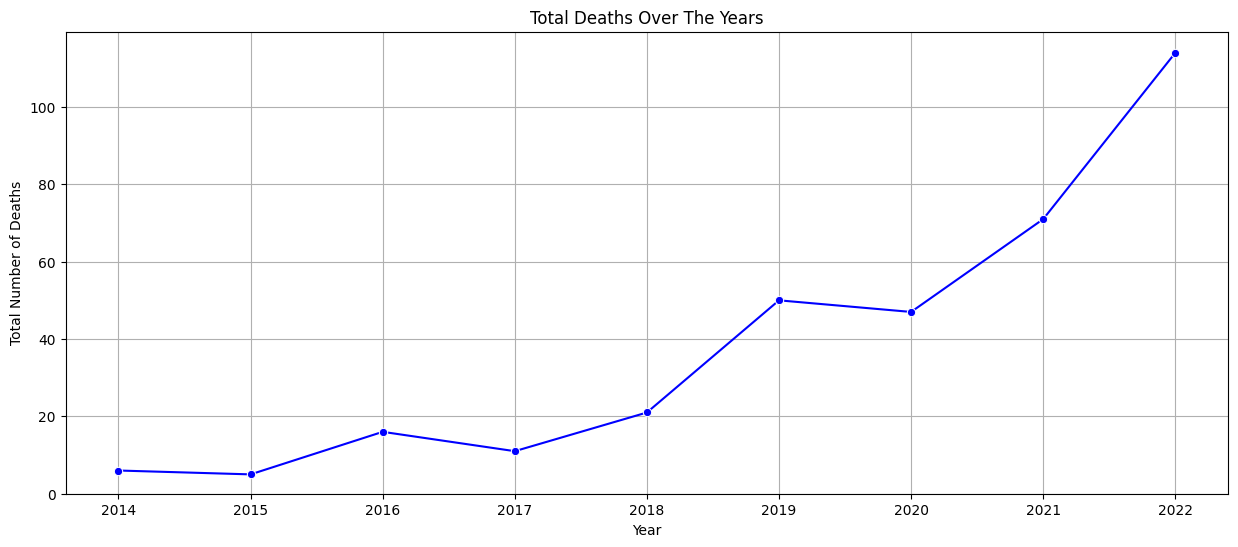

In [ ]:
years_to_plot = range(2014, 2023)
filtered_deaths_df = death_df[death_df['Year'].isin(years_to_plot)].copy()

#--- Use groupby 'Year' and sum the 'Deaths' column ---
total_deaths_by_year = filtered_deaths_df.groupby('Year')['Deaths'].sum().reset_index()

#--- Treat the years in from range (2014-2022) for which no accidents occurred
# and are missing from `total_deaths_by_year` by adding them
# with a death count of 0 for a continuous line:---
all_years_df = pd.DataFrame({'Year': years_to_plot})
total_deaths_by_year = pd.merge(all_years_df, total_deaths_by_year, on='Year', how='left').fillna(0)
total_deaths_by_year['Deaths'] = total_deaths_by_year['Deaths'].astype('Int64')

print("Data used for plotting Total Deaths by Year:")
print(total_deaths_by_year)

#--- Plot the deaths by years ---
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='Deaths', data=total_deaths_by_year, color='blue', marker='o')
plt.title('Total Deaths Over The Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Deaths')
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

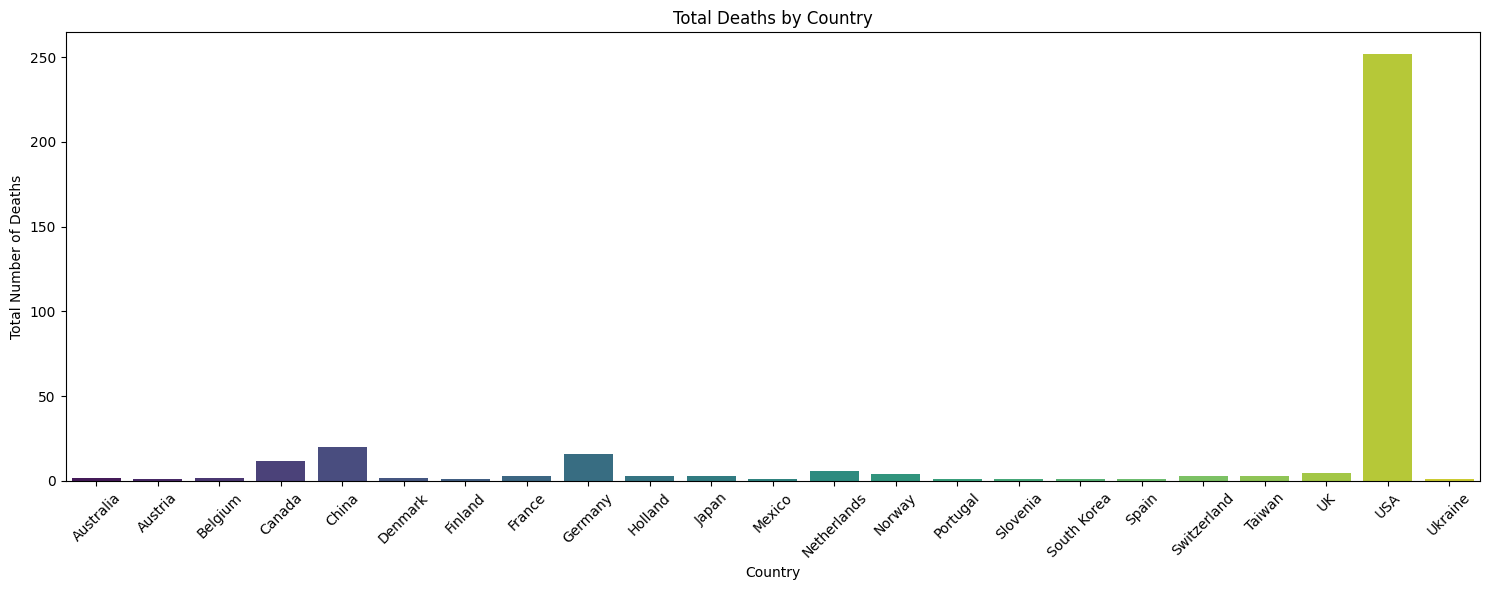

In [ ]:
#--- Death by country ---
death_by_country = death_df.groupby('Country')['Deaths'].sum().reset_index()

#--- Plot the death by country ---
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Deaths', data=death_by_country, palette='viridis')
plt.title('Total Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)
#plt.grid()
plt.tight_layout()
plt.show()

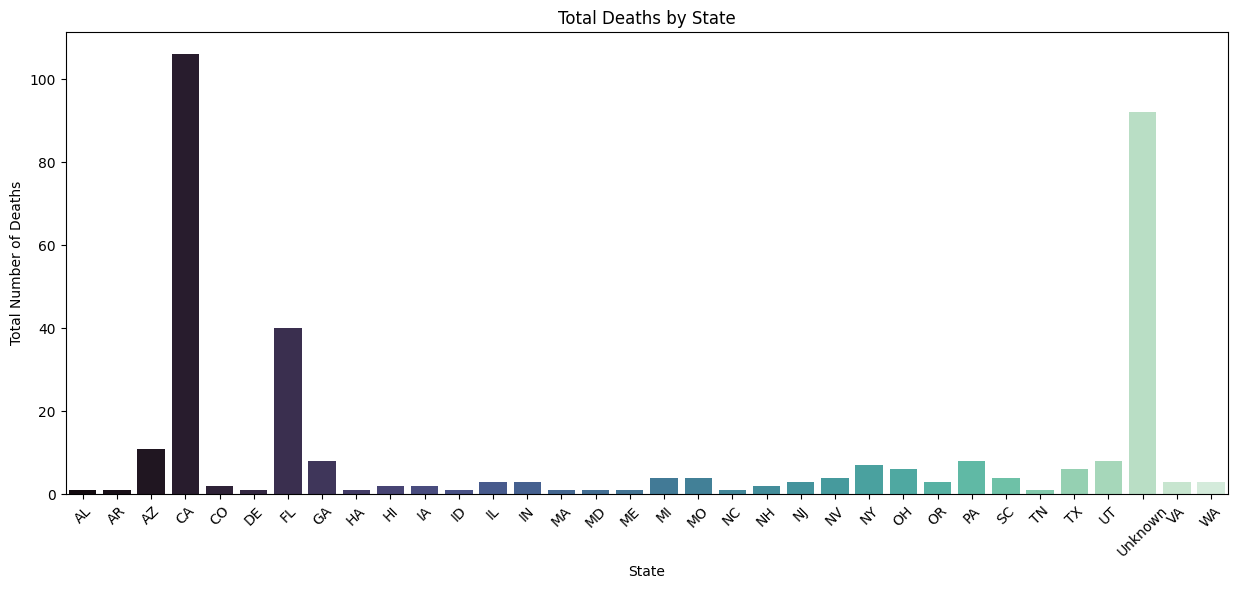

In [ ]:
#--- Death by State ---

state_groupby = death_df.groupby('State')['Deaths'].sum().reset_index()

#--- Plot the groupby ---

plt.figure(figsize=(15, 6))
sns.barplot(x='State', y='Deaths', data=state_groupby, palette='mako')
plt.title('Total Deaths by State')
plt.xlabel('State')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)
plt.show()

Data used for plotting:
     Case #  Deaths
270   274.0       4
253   257.0       3
219   222.0       3
2       3.0       3
172   175.0       3


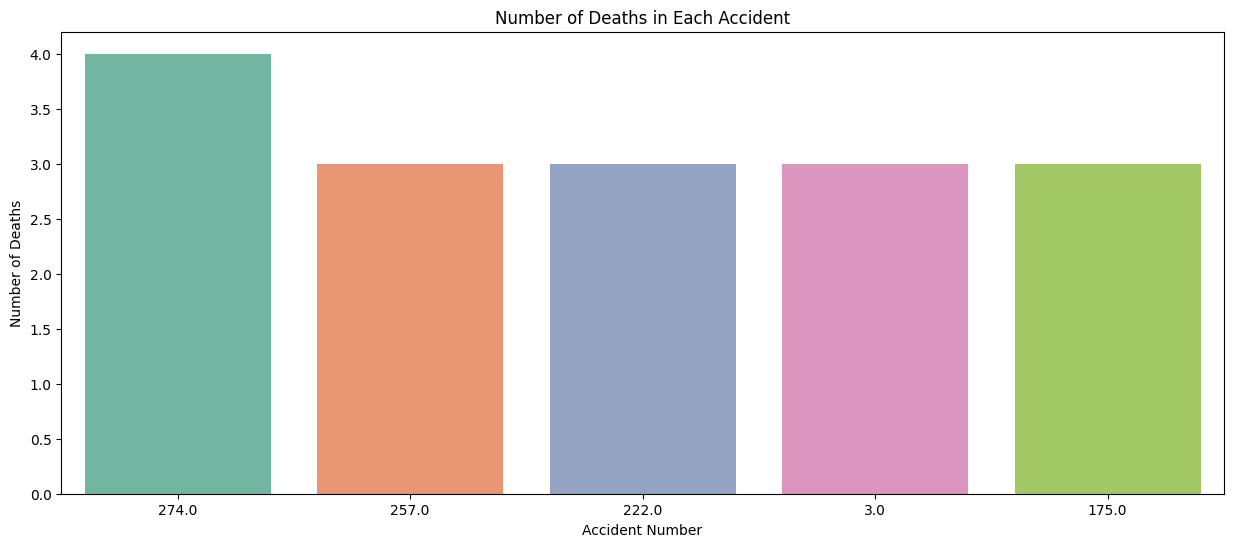

In [ ]:
#--- What is the number of victims (deaths) in each accident? ---

deaths_by_accident = death_df.groupby('Case #')['Deaths'].sum().reset_index()
#--- To limit the plotting we are using head.() taking only top 5 death cases ---
top_accidents_by_deaths = deaths_by_accident.sort_values(by='Deaths', ascending=False).head()

print("Data used for plotting:")
print(top_accidents_by_deaths)

#--- Plot the graph ---
plt.figure(figsize=(15, 6))
sns.barplot(x=top_accidents_by_deaths['Case #'].astype(str), y='Deaths', data=top_accidents_by_deaths, palette='Set2')
plt.title('Number of Deaths in Each Accident')
plt.xlabel('Accident Number')
plt.ylabel('Number of Deaths')
plt.show()

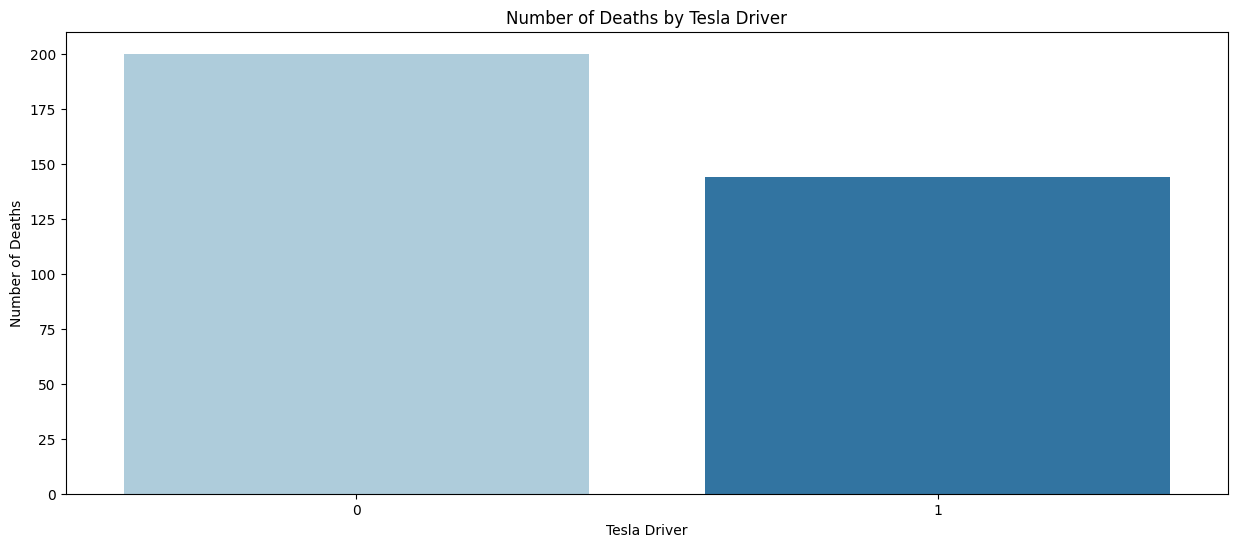

In [ ]:
#--- How many times did tesla drivers die? ---

tesla_drivers_deaths = death_df.groupby('Tesla driver')['Deaths'].sum().reset_index()

#--- Plot the graph ---
plt.figure(figsize=(15, 6))
sns.barplot(x='Tesla driver', y='Deaths', data=tesla_drivers_deaths, palette='Paired')
plt.title('Number of Deaths by Tesla Driver')
plt.xlabel('Tesla Driver')
plt.ylabel('Number of Deaths')
plt.show()

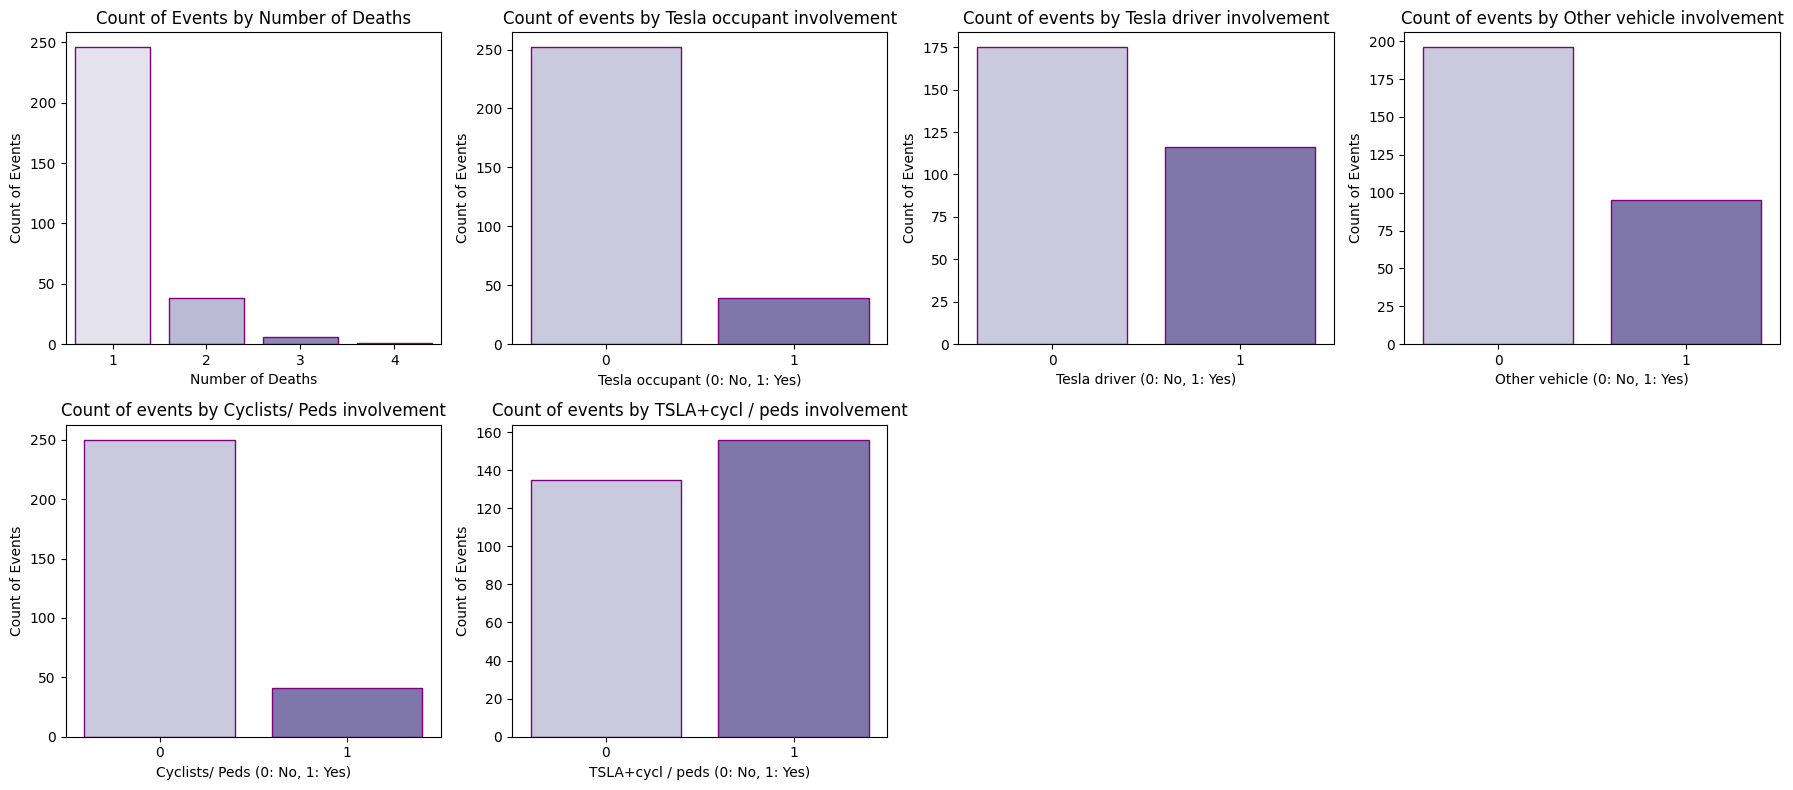

In [ ]:
#--- How many times did the accident involve the death of an occupant or driver of a Tesla
# along with a cyclist or pedestrian? ---
death_list = ['Deaths', 'Tesla occupant', 'Tesla driver', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds']

#--- Plot the graph ---

death_len = len(death_list)
num_cols = 4
# Calculate num_rows based on the number of items and columns to ensure all fit
num_rows = (death_len + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
#--- Flatten the 2D array of axes for easy iteration ---
axes = axes.flatten()
#--- Iterating through the list ---
for i, col in enumerate(death_list):
  ax = axes[i] # to get current axis
  sns.countplot(x=col, data=death_df, palette='Purples', ax=ax, edgecolor='Purple')

  if col == 'Deaths':
    ax.set_title(f'Count of Events by Number of {col}')
    ax.set_xlabel(f'Number of {col}')
    ax.set_ylabel(f'Count of Events')
  else:
    ax.set_title(f'Count of events by {col} involvement')
    ax.set_xlabel(f'{col} (0: No, 1: Yes)')
    ax.set_ylabel('Count of Events')
  if death_df[col].dtype in ['int64', 'float64'] and death_df[col].nunique() <=2:
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0', '1'])

for j in range(i + 1, num_rows * num_cols):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

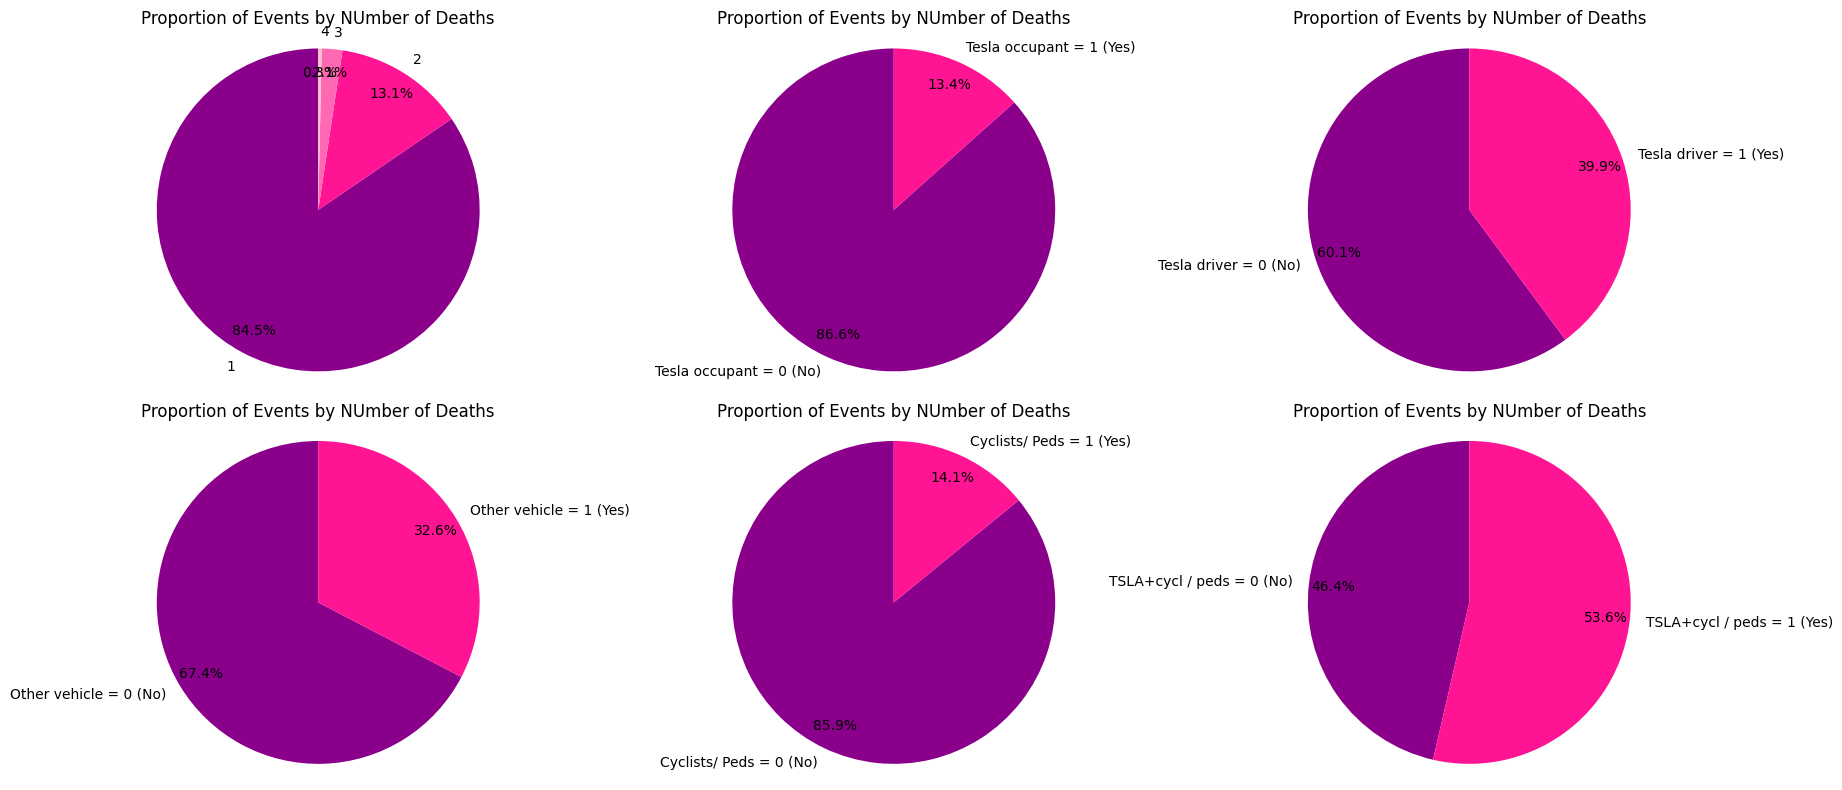

In [ ]:
#--- What is the proportion of events in which one or more occupants died? ---


palette_colors = ["#8B008B", "#FF1493", "#FF69B4", "#FFC0CB", "#7bccc4", "#43a2ca", "#0868ac"]

death_len = len(death_list)
num_cols = 3
num_rows = (death_len + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(death_list):
  ax = axes[i]
  counts = death_df[col].value_counts().sort_index() # Get counts of unique values in the current column using sort
  if col == 'Deaths':
    current_labels = [str(int(val)) for val in counts.index]
    current_colors = palette_colors[:len(counts)]
    plot_title = f'Proportion of Events by NUmber of {col}'
    autopct_format = '%1.1f%%'
  else:
    current_labels = [f'{col} = 0 (No)', f'{col} = 1 (Yes)']
    if 0 in counts.index and 1 in counts.index:
      values_to_plot = [counts.get(0, 0), counts.get(1, 0)] # get counts, setting default as zero
      current_colors = [palette_colors[0], palette_colors[1]]
    elif 0 in counts.index:
      values_to_plot = [counts.get(0, 0)]
      current_labels = [f'{col}= 0 (No)']
      current_colors = [palette_colors[0]]
    elif 1 in counts.index:
      values_to_plot = [counts.get(1, 0)]
      current_labels = [f'{col} = 1 (Yes)']
      current_colors = [palette_colors[1]]
    else:
      values_to_plot = []
      current_labels = []
      current_colors = []

    plt_title = f'Proportion of the events by {col} Involvement'
    autopct_format = '%.1f%%'


  if counts.sum() > 0:
    if col == 'Deaths':
      ax.pie(counts, labels=current_labels, autopct=autopct_format, colors=current_colors, startangle=90, pctdistance=0.85)
    else:
      if len(values_to_plot) > 0:
        ax.pie(values_to_plot, labels=current_labels, autopct=autopct_format, colors=current_colors, startangle=90, pctdistance=0.85)
      else:
        ax.text(0.5, 0.5, 'No data to display', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
  else:
    ax.text(0.5, 0.5, 'No data to display', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

  ax.set_title(plot_title)
  ax.axis('equal')

#--- Code to hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

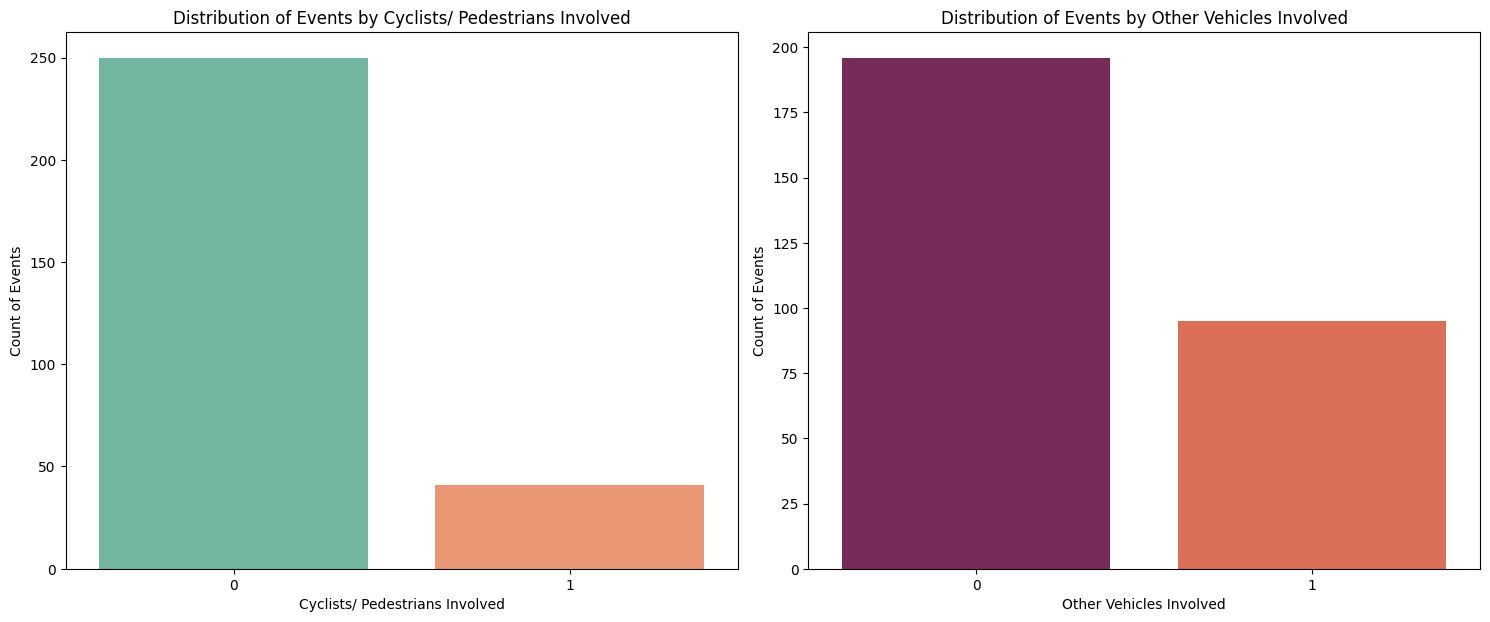

In [ ]:
# --- What is the distribution of events in which the vehicle hit a cyclist or a pedestrian? ---

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.countplot(x='Cyclists/ Peds', data=death_df, palette='Set2')
plt.title('Distribution of Events by Cyclists/ Pedestrians Involved')
plt.xlabel('Cyclists/ Pedestrians Involved')
plt.ylabel('Count of Events')

#--- What is the frequency of Tesla colliding with other vehicles? ---

plt.subplot(1, 2, 2)
sns.countplot(x='Other vehicle', data=death_df, palette='rocket')
plt.title('Distribution of Events by Other Vehicles Involved')
plt.xlabel('Other Vehicles Involved')
plt.ylabel('Count of Events')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


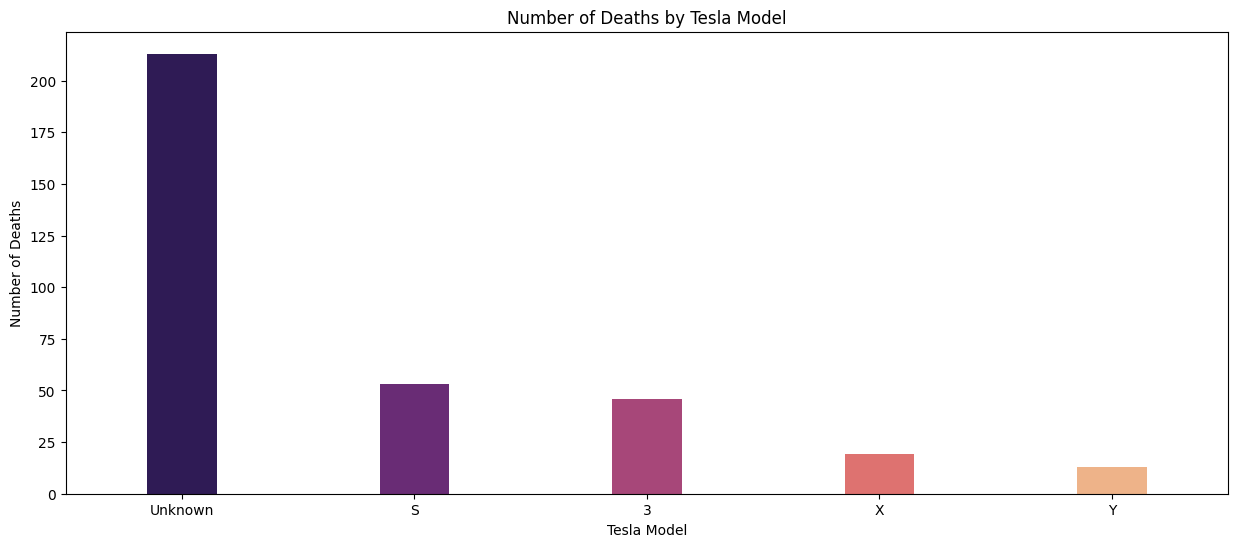

In [ ]:
#--- Study the event distribution across models ---

tesla_models = death_df.groupby('Model')['Deaths'].sum().reset_index()
tesla_models = tesla_models.sort_values(by='Deaths', ascending=False)

#--- Plot the graph ---

plt.figure(figsize=(15, 6))
sns.barplot(x='Model', y='Deaths', data=tesla_models, palette='magma', width=0.3)
plt.title('Number of Deaths by Tesla Model')
plt.xlabel('Tesla Model')
plt.ylabel('Number of Deaths')
plt.show()

In [ ]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 293
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              291 non-null    float64       
 1   Year                                                                291 non-null    int64         
 2   Date                                                                291 non-null    datetime64[ns]
 3   Country                                                             291 non-null    object        
 4   State                                                               291 non-null    object        
 5   Description                                                         291 non-null    object        
 6   Deaths                                                         

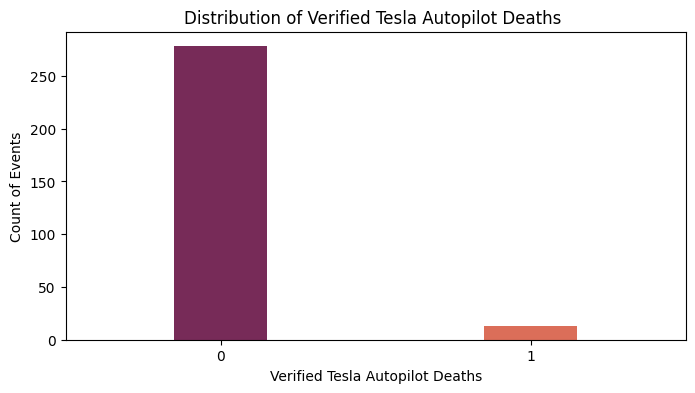

In [ ]:
#--- Check the distribution of verified Tesla autopilot deaths ---

plt.figure(figsize=(8, 4))
sns.countplot(x='Verified Tesla Autopilot Deaths', data=death_df, palette='rocket', width=0.3)
plt.title('Distribution of Verified Tesla Autopilot Deaths ')
plt.xlabel('Verified Tesla Autopilot Deaths')
plt.ylabel('Count of Events')
plt.show()